# **Cocoon: Fuzzy Join/Column Standardization/Entity Matching**


## **You Need...**

1. LLM API (only support openai for now; please send a feature request for other API)
2. Data Warehouse Con (Snowflake/DuckDB/csv)



In [ ]:
! pip install cocoon_data -U

In [2]:
from cocoon_data import *

In [3]:
#@title  Download example table (skip this step if you have your own table)
import requests

files = {
    "procedure_vocabulary.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/procedure_vocabulary.csv",
    "procedures.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/procedures.csv",
}

# Loop through the files dictionary
for file_name, url in files.items():
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open file in binary write mode
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}.")

procedure_vocabulary.csv downloaded successfully.
procedures.csv downloaded successfully.


In [ ]:
#@title Provide your LLM API

# if you use Open AI, please ensure GPT-4 is available
openai.api_key  = ''

# # if you use anthropic, please ensure Claude 3 Opus is available
# os.environ["ANTHROPIC_API_KEY"] = ""
# openai.api_type ='claude'

# # if you use Vertex AI, please ensure Claude 3 Opus is available
# openai.api_type = 'AnthropicVertex'
# os.environ['AnthropicVertex_region'] = "us-east5"
# os.environ['AnthropicVertex_project_id'] = ""

# test if LLM works
test_message = "hello"
messages = [{"role": "user", "content": test_message}]
response = call_llm_chat(messages, temperature=0.1, top_p=0.1)
print(response['choices'][0]['message']['content'])

Hello! How can I assist you today?


In [6]:
# @title Provide Data Warehouse Con

# In-mem duckdb loads the df
con = duckdb.connect(database=':memory:')
df = pd.read_csv("procedures.csv")
table_name = "procedures"
df.columns = [clean_column_name(col) for col in df.columns]
con.register(table_name, df)
df = pd.read_csv("procedure_vocabulary.csv")
table_name = "procedure_vocabulary"
df.columns = [clean_column_name(col) for col in df.columns]
con.register(table_name, df)


# # Snowflake: specify the con info and table ame
# con = snowflake.connector.connect(
#     # check out your url: {account}.snowflakecomputing.com
#     account="",
#     user="",
#     password="",
#     warehouse="",
#     database="",
#     schema="",
# )
# # Please enter the table to stage/clean
# # Make sure it's a table (queries over view can be slow)

In [7]:
query_widget, cocoon_workflow = create_cocoon_workflow(con)

In [8]:
query_widget.display()

🔍 Matching rows... We will only match the first 10 rows for trial.
😊 Please let us know if you want the complete feature!
💪 Working on the row 1 ...
💪 Working on the row 2 ...
💪 Working on the row 3 ...
💪 Working on the row 4 ...
💪 Working on the row 5 ...


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")



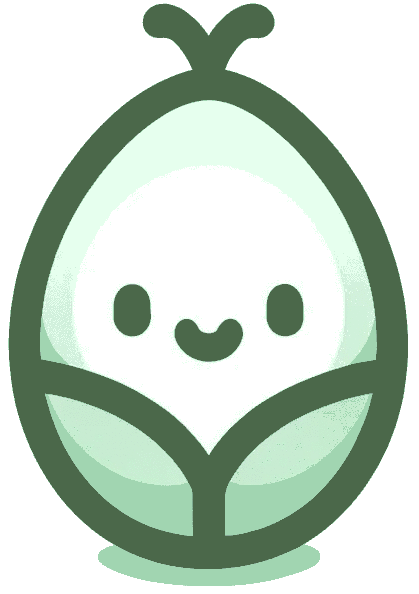

🤓 Do you want to save the file?


Button(description='Save File', style=ButtonStyle())

In [9]:
cocoon_workflow.start_workflow()